<a href="https://colab.research.google.com/github/Meemansha-spec/meem.github.io/blob/master/ML_PROJECT_Predict_Avocado_Price_using_facebook_prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Prophet works with seasonal dataset
- WE HAVE TO FORECAST THE AVOCADO PRICE

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from fbprophet import Prophet

In [2]:
av_data = pd.read_csv('/content/drive/MyDrive/avocado.csv',parse_dates=True,index_col = 'Date')

In [3]:
av_data.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,,
2015-12-27,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
2015-12-20,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2015-12-13,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
2015-12-06,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
2015-11-29,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
av_data.shape

(18249, 13)

In [5]:
av_data.dtypes

Unnamed: 0        int64
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [6]:
av_data.index

DatetimeIndex(['2015-12-27', '2015-12-20', '2015-12-13', '2015-12-06',
               '2015-11-29', '2015-11-22', '2015-11-15', '2015-11-08',
               '2015-11-01', '2015-10-25',
               ...
               '2018-03-11', '2018-03-04', '2018-02-25', '2018-02-18',
               '2018-02-11', '2018-02-04', '2018-01-28', '2018-01-21',
               '2018-01-14', '2018-01-07'],
              dtype='datetime64[ns]', name='Date', length=18249, freq=None)

In [7]:
av_data.columns

Index(['Unnamed: 0', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

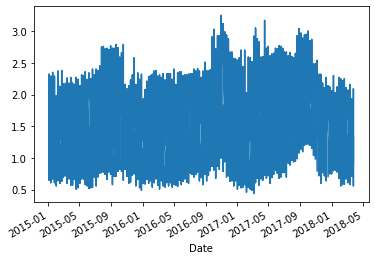

In [8]:
av_data['AveragePrice'].plot()

In [9]:
av_data.sort_index(ascending=True)

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,,
2015-01-04,51,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
2015-01-04,51,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
2015-01-04,51,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
2015-01-04,51,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
2015-01-04,51,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-25,0,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago
2018-03-25,0,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral
2018-03-25,0,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral


In [25]:
av_data.tail()

,Date,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,2018-02-04,7,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,8,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,9,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,10,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,2018-01-07,11,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [10]:
av_data['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

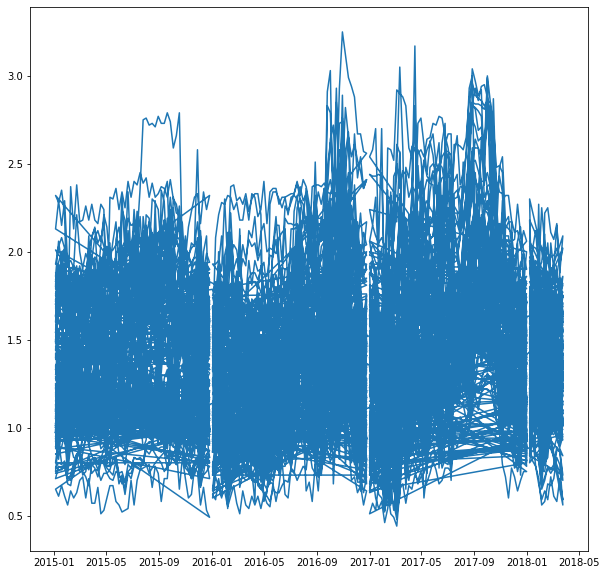

In [11]:
plt.figure(figsize = (10,10))
plt.plot(av_data.index , av_data['AveragePrice'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]), <a list of 54 Text major ticklabel objects>)

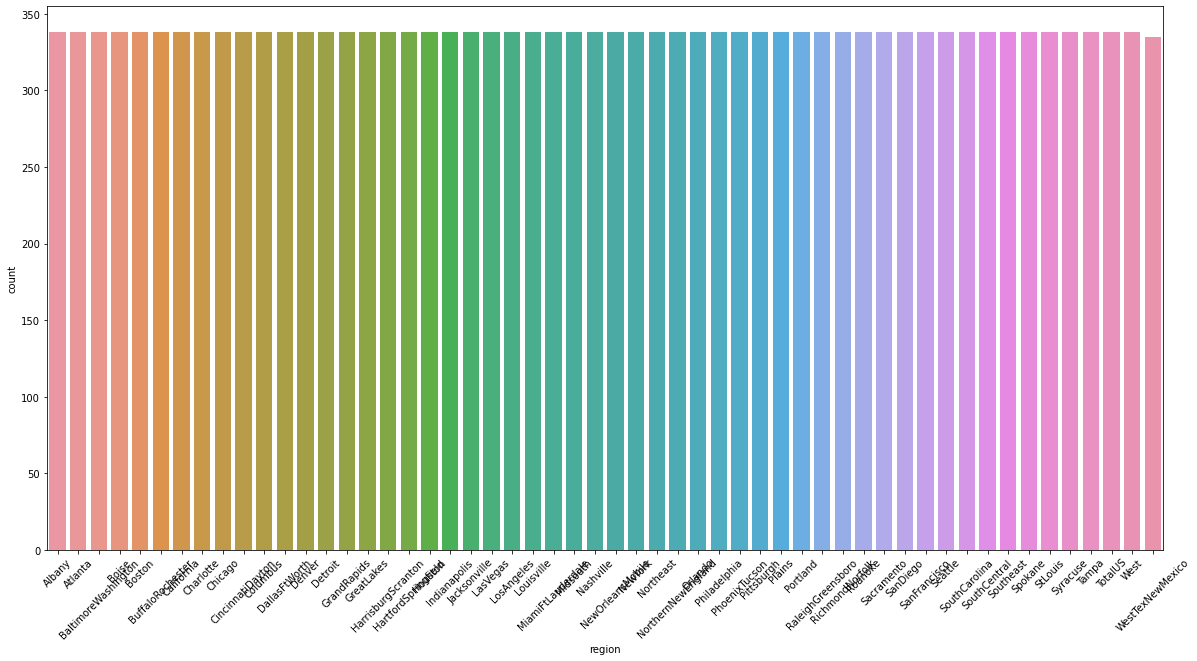

In [12]:
plt.figure(figsize = (20,10))
sns.countplot(data= av_data , x = 'region')
plt.xticks(rotation = 45)

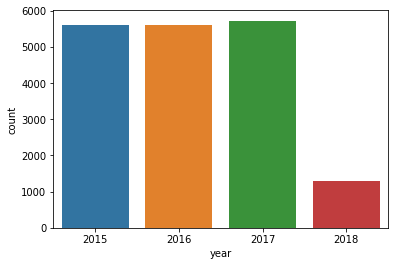

In [13]:
sns.countplot(data = av_data,x = 'year')

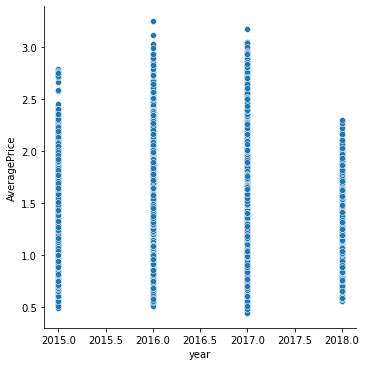

In [14]:
sns.relplot(data = av_data , x = 'year' , y = 'AveragePrice')

## Now to make prediction

In [15]:
av_data.reset_index('Date',inplace=True)

In [16]:
avocado_forecast = av_data[['Date','AveragePrice']]

In [17]:
avocado_forecast.head()

,Date,AveragePrice
0,2015-12-27,1.33
1,2015-12-20,1.35
2,2015-12-13,0.93
3,2015-12-06,1.08
4,2015-11-29,1.28


## In order to work with `Prophet` you need to rename the columns `y` and `ds`

In [18]:
avocado_forecast = avocado_forecast.rename(columns = {'Date':'ds','AveragePrice':'y'})

In [19]:
m = Prophet()

In [20]:
m.fit(avocado_forecast)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [21]:
## forecast the future
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

In [22]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.499048,0.915414,1.856993,1.499048,1.499048,-0.117506,-0.117506,-0.117506,-0.117506,-0.117506,-0.117506,0.0,0.0,0.0,1.381543
1,2015-01-11,1.493824,0.923584,1.879486,1.493824,1.493824,-0.108960,-0.108960,-0.108960,-0.108960,-0.108960,-0.108960,0.0,0.0,0.0,1.384864
2,2015-01-18,1.488600,0.880488,1.830630,1.488600,1.488600,-0.108526,-0.108526,-0.108526,-0.108526,-0.108526,-0.108526,0.0,0.0,0.0,1.380074
3,2015-01-25,1.483376,0.860583,1.828631,1.483376,1.483376,-0.127281,-0.127281,-0.127281,-0.127281,-0.127281,-0.127281,0.0,0.0,0.0,1.356095
4,2015-02-01,1.478152,0.888304,1.800061,1.478152,1.478152,-0.155251,-0.155251,-0.155251,-0.155251,-0.155251,-0.155251,0.0,0.0,0.0,1.322901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,2019-03-21,1.158811,0.519532,1.646998,0.939901,1.367826,-0.085960,-0.085960,-0.085960,-0.085960,-0.085960,-0.085960,0.0,0.0,0.0,1.072851
530,2019-03-22,1.158068,0.536692,1.639065,0.938122,1.368291,-0.084185,-0.084185,-0.084185,-0.084185,-0.084185,-0.084185,0.0,0.0,0.0,1.073883
531,2019-03-23,1.157325,0.511803,1.623591,0.936425,1.368704,-0.082135,-0.082135,-0.082135,-0.082135,-0.082135,-0.082135,0.0,0.0,0.0,1.075190
532,2019-03-24,1.156583,0.549656,1.618782,0.934729,1.368858,-0.079830,-0.079830,-0.079830,-0.079830,-0.079830,-0.079830,0.0,0.0,0.0,1.076753


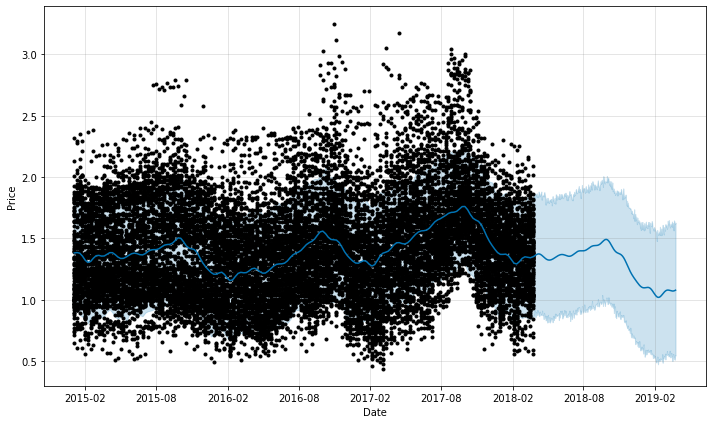

In [23]:
figure = m.plot(forecast , xlabel = 'Date' , ylabel = 'Price')

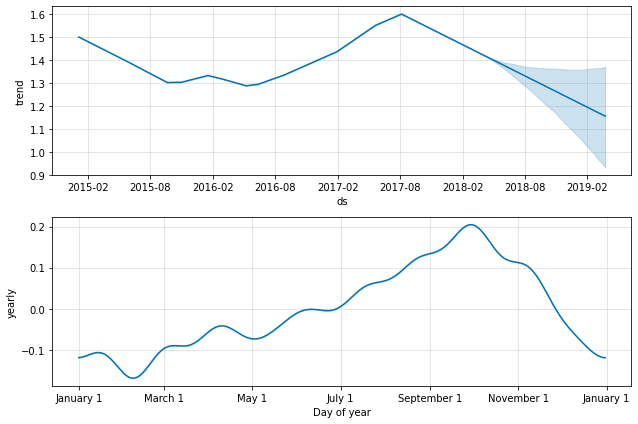

In [24]:
figure = m.plot_components(forecast)

## Make Prediction for specific region

In [28]:
avocado_df = pd.read_csv('/content/drive/MyDrive/avocado.csv')
avocado_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [30]:
avocado_df['region'].value_counts()

Seattle                338
Northeast              338
HartfordSpringfield    338
StLouis                338
Philadelphia           338
Houston                338
MiamiFtLauderdale      338
Syracuse               338
GrandRapids            338
NewYork                338
Louisville             338
PhoenixTucson          338
SouthCarolina          338
RichmondNorfolk        338
Atlanta                338
Columbus               338
Midsouth               338
RaleighGreensboro      338
Chicago                338
Albany                 338
TotalUS                338
NorthernNewEngland     338
DallasFtWorth          338
Portland               338
Denver                 338
Boise                  338
BaltimoreWashington    338
Spokane                338
Boston                 338
HarrisburgScranton     338
Pittsburgh             338
NewOrleansMobile       338
Southeast              338
LosAngeles             338
Sacramento             338
SanFrancisco           338
CincinnatiDayton       338
O

In [31]:
avocado_df_sample = avocado_df[avocado_df['region']=='West']

In [33]:
avocado_df_sample.shape

(338, 14)

In [34]:
avocado_df_sample = avocado_df_sample.sort_values('Date')

In [35]:
avocado_df_sample

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2755,51,2015-01-04,0.89,5794410.58,2275446.87,2582300.65,97024.09,839638.97,688813.01,150819.57,6.39,conventional,2015,West
11881,51,2015-01-04,1.40,187548.30,70313.71,72942.11,24.30,44268.18,10023.72,34244.46,0.00,organic,2015,West
2754,50,2015-01-11,0.95,5333097.71,2203111.92,2292761.26,127412.09,709812.44,598705.08,111073.82,33.54,conventional,2015,West
11880,50,2015-01-11,1.39,223156.55,80139.16,111395.01,63.88,31558.50,9296.76,22261.74,0.00,organic,2015,West
2753,49,2015-01-18,0.96,5475363.01,2431736.63,2258069.63,76348.13,709208.62,527358.78,181809.88,39.96,conventional,2015,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18227,2,2018-03-11,1.63,264691.87,27566.25,60383.57,276.42,176465.63,107174.93,69290.70,0.00,organic,2018,West
18226,1,2018-03-18,1.73,210067.47,33437.98,47165.54,110.40,129353.55,73163.12,56020.24,170.19,organic,2018,West
9103,1,2018-03-18,0.99,7254940.65,2099082.66,1707752.84,115997.93,3332107.22,1333247.05,1982086.02,16774.15,conventional,2018,West
9102,0,2018-03-25,0.93,7667064.46,2567279.74,1912986.38,118289.91,3068508.43,1309580.19,1745630.06,13298.18,conventional,2018,West


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


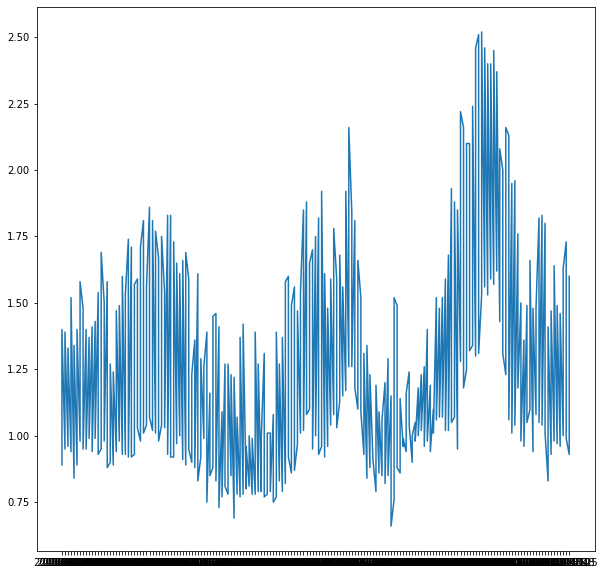

In [37]:
plt.figure(figsize = (10,10))
plt.plot(avocado_df_sample['Date'],avocado_df_sample['AveragePrice'])

## Make predictions

In [38]:
avocado_df_sample = avocado_df_sample.rename(columns = {'Date':'ds','AveragePrice':'y'})

In [39]:
avocado_df_sample.head()

,Unnamed: 0,ds,y,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2755,51,2015-01-04,0.89,5794410.58,2275446.87,2582300.65,97024.09,839638.97,688813.01,150819.57,6.39,conventional,2015,West
11881,51,2015-01-04,1.40,187548.30,70313.71,72942.11,24.30,44268.18,10023.72,34244.46,0.00,organic,2015,West
2754,50,2015-01-11,0.95,5333097.71,2203111.92,2292761.26,127412.09,709812.44,598705.08,111073.82,33.54,conventional,2015,West
11880,50,2015-01-11,1.39,223156.55,80139.16,111395.01,63.88,31558.50,9296.76,22261.74,0.00,organic,2015,West
2753,49,2015-01-18,0.96,5475363.01,2431736.63,2258069.63,76348.13,709208.62,527358.78,181809.88,39.96,conventional,2015,West


In [40]:
avocado_df_sample = avocado_df_sample[['ds','y']]

In [41]:
avocado_df_sample

,ds,y
2755,2015-01-04,0.89
11881,2015-01-04,1.40
2754,2015-01-11,0.95
11880,2015-01-11,1.39
2753,2015-01-18,0.96
...,...,...
18227,2018-03-11,1.63
18226,2018-03-18,1.73
9103,2018-03-18,0.99
9102,2018-03-25,0.93


In [42]:
m = Prophet()

In [43]:
m.fit(avocado_df_sample)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [44]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

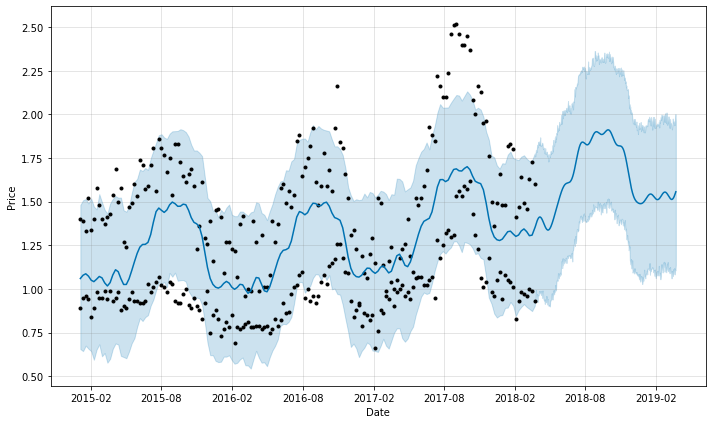

In [45]:
figure = m.plot(forecast , xlabel = 'Date' , ylabel = 'Price')

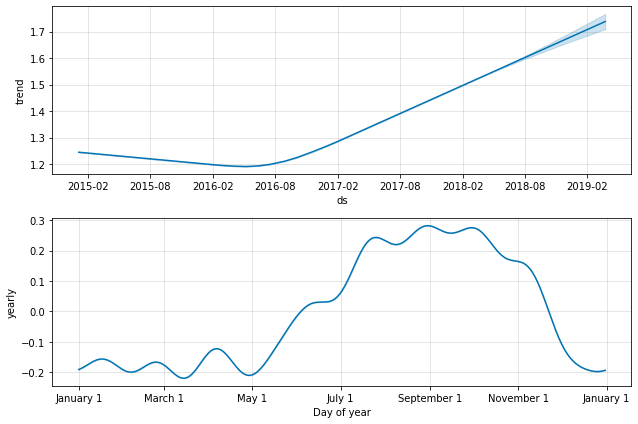

In [46]:
figure = m.plot_components(forecast)